In [1]:
import csv
import time
import matplotlib.pyplot as plt
import seaborn as sns
start=time.time()
with open('trip_data_5.csv', 'r') as file:
    csv = csv.reader(file)
    data = list(csv)

In [2]:
(time.time()-start)/60

3.791014806429545

In [3]:
data[0]

['medallion',
 ' hack_license',
 ' vendor_id',
 ' rate_code',
 ' store_and_fwd_flag',
 ' pickup_datetime',
 ' dropoff_datetime',
 ' passenger_count',
 ' trip_time_in_secs',
 ' trip_distance',
 ' pickup_longitude',
 ' pickup_latitude',
 ' dropoff_longitude',
 ' dropoff_latitude']

### 1. What datetime range does your data cover?  How many rows are there total?

In [4]:
from datetime import datetime
pickup_datetime=data[1][5]
dropoff_datetime=data[-1][6]

print('pickup_date: ',pickup_datetime)
print('dropoff_date: ',dropoff_datetime)

pickup_date:  2013-05-01 00:04:00
dropoff_date:  2013-05-26 22:17:53


In [5]:
total_rows=len(data)
print('Total Number of the rows in dataset(including attributes): ',total_rows)
total_data=total_rows-1
print('Total Number of the rows in dataset(excluding attributes): ',total_data)

Total Number of the rows in dataset(including attributes):  15285050
Total Number of the rows in dataset(excluding attributes):  15285049


### 2. What are the field names?  Give descriptions for each field.

In [6]:
print('The field names are:  ')
print(data[0])

The field names are:  
['medallion', ' hack_license', ' vendor_id', ' rate_code', ' store_and_fwd_flag', ' pickup_datetime', ' dropoff_datetime', ' passenger_count', ' trip_time_in_secs', ' trip_distance', ' pickup_longitude', ' pickup_latitude', ' dropoff_longitude', ' dropoff_latitude']



* **medallion**: It is a unique identifier for the taxi cab
* **hack_license**: A unique license ID assigned for the taxi driver
* **vendor_id**: A unique identification provided to the taxi company
* **rate_code**: The rate code for the trip (e.g. 1=standard rate; 2=JFK airport rate; 3= Newark; 4=Nassau or Westchester; 5 =Negotiated fare; 6 =Group ride .)
* **store_and_fwd_flag**: A flag indicating whether the trip data was held in vehicle memory before sending to the vendor (Y=store and forward; N=not a store and forward trip)
* **pickup_datetime**: The date and time when the passengers were picked up
* **dropoff_datetime**: The date and time when the passengers were dropped off
* **passenger_coun**: Total number of passengers onboard the vehicle for each trip (driver entered value)
* **trip_time_in_secs**: Duration of each trip in seconds
* **trip_distance**: Each trip distance in miles
* **pickup_longitude**: Longitude coordinate of the pickup location
* **pickup_latitude**: Latitude coordinate of the pickup location
* **dropoff_longitude**: Longitude coordinate of the dropoff location
* **dropoff_latitude**: Latitude coordinate of the dropoff location

### 3. Give some sample data for each field.

In [7]:
sample=data[:2]
print(sample[0])
print(sample[1])

['medallion', ' hack_license', ' vendor_id', ' rate_code', ' store_and_fwd_flag', ' pickup_datetime', ' dropoff_datetime', ' passenger_count', ' trip_time_in_secs', ' trip_distance', ' pickup_longitude', ' pickup_latitude', ' dropoff_longitude', ' dropoff_latitude']
['3B1A31779BCE30367D00C6F7911573C0', 'AED0496C937E41C4515D64E851F873AB', 'VTS', '1', '', '2013-05-01 00:04:00', '2013-05-01 00:12:00', '1', '480', '1.34', '-73.982285', '40.772816', '-73.986214', '40.758743']


### 4. What MySQL data types / len would you need to store each of the fields?

#### Data type and length of each field:
* **medallion**: VARCHAR(32)
* **hack_license**: VARCHAR(32)
* **vendor_id**: VARCHAR(3)
* **rate_code**: INT(2)
* **store_and_fwd_flag**: VARCHAR(1)
* **pickup_datetime**: DATETIME, format: YYYY-MM-DD HH:MM:SS
* **dropoff_datetime**: DATETIME, format: YYYY-MM-DD HH:MM:SS
* **passenger_coun**: INT(2)
* **trip_time_in_secs**: INT(6)
* **trip_distance**: FLOAT(5,2)
* **pickup_longitude**: DECIMAL(8,6)
* **pickup_latitude**: DECIMAL(8,6)
* **dropoff_longitude**: DECIMAL(8,6)
* **dropoff_latitude**: DECIMAL(8,6)

###  5. What is the geographic range of your data (min/max - X/Y)?
     1. Plot this (approximately on a map)


In [189]:
 import csv
pickup_lat_min = 90
pickup_lat_max = -90
pickup_long_min = 180
pickup_long_max = -180
dropoff_lat_min = 90
dropoff_lat_max = -90
dropoff_long_min = 180
dropoff_long_max = -180
n = 0
with open('trip_data_5.csv', 'r') as file:
    r = csv.DictReader(file)
    for row in r:
        if n > 0:
            try:
                pickup_lat = float(row[' pickup_latitude'])
                pickup_long = float(row[' pickup_longitude'])
                dropoff_lat = float(row[' dropoff_latitude'])
                dropoff_long = float(row[' dropoff_longitude'])
                if (-74.4 <= pickup_long <= -72.05 and 40.4 <= pickup_lat<= 41.02):
                    pickup_lat_min = min(pickup_lat_min, pickup_lat)
                    pickup_lat_max = max(pickup_lat_max, pickup_lat)
                    pickup_long_min = min(pickup_long_min, pickup_long)
                    pickup_long_max = max(pickup_long_max, pickup_long)
                if dropoff_long is not None and (-74.5 <= dropoff_long <= -72.02 and 40.75 <= dropoff_lat<= 41):
                    dropoff_lat_min = min(dropoff_lat_min, dropoff_lat)
                    dropoff_lat_max = max(dropoff_lat_max, dropoff_lat)
                    dropoff_long_min = min(dropoff_long_min, dropoff_long)
                    dropoff_long_max = max(dropoff_long_max, dropoff_long)
            except ValueError:
                continue
        n+=1
        if n > 1000000000:
            break
print("pickup_latitude_min: " ,pickup_lat_min)
print("pickup_longitude_min: ",pickup_long_min)

print("pickup_latitude_max: ",pickup_lat_max)
print("pickup_longitude_max: ",pickup_long_max)

print("dropoff_latitude_min: ",dropoff_lat_min)
print("dropoff_longitude_min: ",dropoff_long_min)

print("dropoff_latitude_max: ",dropoff_lat_max)
print("dropoff_longitude_max: ",dropoff_long_max)

pickup_latitude_min:  40.400002
pickup_longitude_min:  -74.399635
pickup_latitude_max:  41.019974
pickup_longitude_max:  -72.199997
dropoff_latitude_min:  40.75
dropoff_longitude_min:  -74.491753
dropoff_latitude_max:  40.99995
dropoff_longitude_max:  -72.066666


###  6. What is the average computed trip distance? (You should use Haversine Distance)
     1. Draw a histogram of the trip distances binned anyway you see fit.


In [13]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
   
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3958.8 # Radius of earth in kilometers. Use 3958.8 for miles.
    return c * r

In [68]:
average_distance=[]
for row in range(1,len(data)):
    if data[row][10]=='' or data[row][11]=='' or data[row][12]=='' or data[row][13]=='':
        continue
    else:
        ans= haversine(float(data[row][10]),float(data[row][11]),float(data[row][12]),float(data[row][13]))
        
        average_distance.append(round(ans,ndigits=2))

In [92]:
len(average_distance)

15285010

In [165]:
average_distance=sorted(average_distance)

mean=sum(average_distance)/len(average_distance)

median=average_distance[int(len(average_distance)/2)]

Q1=average_distance[len(average_distance)//4]

Q3=average_distance[(len(average_distance)//4)*3]

IQR= Q3-Q1

lower = round(Q1-1.5*IQR,ndigits=2)
higher= round(Q3+1.5*IQR,ndigits=2)

In [166]:
lower,higher

(-1.78, 5.02)

In [174]:
cleaned_data=[]
for value in average_distance:
    if value <= higher:
        cleaned_data.append(value)

In [176]:
len(cleaned_data)

13964486

In [178]:
min(cleaned_data),max(cleaned_data)

(0.0, 5.02)

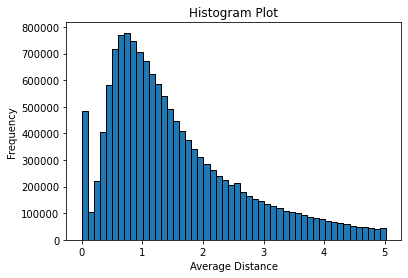

In [190]:
import matplotlib.pyplot as plt

num_bins = 50  # Experimenting with this value
plt.hist(cleaned_data, bins=num_bins, edgecolor='k', range=(0.0, 5.02))
plt.xlabel('Average Distance')
plt.ylabel('Frequency')
plt.title('Histogram Plot')
plt.show()


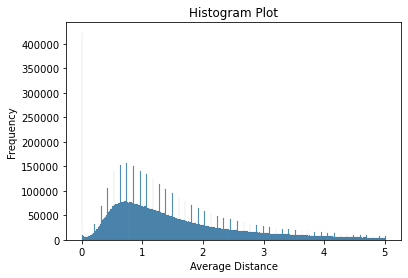

In [191]:
sns.histplot(data=cleaned_data)
plt.xlabel('Average Distance')
plt.ylabel('Frequency')
plt.title('Histogram Plot')
plt.show()

###  7. What are the distinct values for each field? (If applicable)


In [31]:
for column in range(len(data[0])):
    unique=[]
    for row in range(1,len(data)):
        unique.append(data[row][column])
    print('Number of distinct values in {}: {} '.format(data[0][column],len(set(unique))))
    if len(set(unique))>2:
        print('The distinct values are: ',list(set(unique))[:5])
    else:
        print('The distinct values are: ',list(set(unique)))
    print()
    

Number of distinct values in medallion: 13476 
The distinct values are:  ['262E47307C21E83C554CBC776F162B6C', 'AEB71B5F990A29E335C76ECBC28F9DB8', 'F55993E6D22D458A8F4A69AB38FF48CE', '962CD9C2298CA815B9C8FC831E694BB3', '9409531456308578F69EA758905CA4F9']

Number of distinct values in  hack_license: 33280 
The distinct values are:  ['B4BF30B5C1F3FCDAFF1F730CB5A775B5', 'A9E021DF57613D5EC9EBBDFA2999981A', '238067D9B875E1A4153EE18CADFDF499', 'C8DAFE07427E4EBEE671CCB0F1329607', 'B0B1A680BE3F3B581E1F5AD2137FB87D']

Number of distinct values in  vendor_id: 2 
The distinct values are:  ['VTS', 'CMT']

Number of distinct values in  rate_code: 10 
The distinct values are:  ['210', '2', '65', '5', '0']

Number of distinct values in  store_and_fwd_flag: 3 
The distinct values are:  ['', 'Y', 'N']

Number of distinct values in  pickup_datetime: 2342601 
The distinct values are:  ['2013-05-13 12:22:53', '2013-05-27 20:18:30', '2013-05-26 03:28:34', '2013-05-26 14:41:31', '2013-05-09 14:22:43']

Numbe

###  8. For other numeric types besides lat and lon, what are the min and max values?

####  Ans. 
1. Fields with numeric datatype other than latitudes, longitudes and Datetime are "rate_code, passenger_count, trip_time_in_secs, trip_distance".
2. The index values of the above mentioned fields are [3, 7, 8, 9]

In [35]:
indicies=[data[0].index(' rate_code'),data[0].index(' passenger_count'),
          data[0].index(' trip_time_in_secs'),data[0].index(' trip_distance')]
print(indicies)

[3, 7, 8, 9]


In [36]:
for index_number in indicies:
    values=[]
    for row in range(1,len(data)):
        values.append(data[row][index_number])
    print('The minimum and maximum values in "'+data[0][index_number]+'" field are:')
    print('Minimum Value: ',min(values))
    print('Maximum Value: ',max(values))
    print()
    

The minimum and maximum values in " rate_code" field are:
Minimum Value:  0
Maximum Value:  7

The minimum and maximum values in " passenger_count" field are:
Minimum Value:  0
Maximum Value:  6

The minimum and maximum values in " trip_time_in_secs" field are:
Minimum Value:  0
Maximum Value:  9995

The minimum and maximum values in " trip_distance" field are:
Minimum Value:  .00
Maximum Value:  98.00



###  9. Create a chart which shows the average number of passengers each hour of the day.              (X axis should have 24 hours)

In [37]:
from datetime import datetime
hour_pass={}
for i in range(24):
    hour_pass[i]=[]

for row in range(1,len(data)):
    time=datetime.strptime(data[row][5],'%Y-%m-%d %H:%M:%S').hour
    hour_pass[time].append(int(data[row][7]))
    
averages=[]
for i in range(len(hour_pass)):
    mean=sum(hour_pass[i])/len(hour_pass[i])
    averages.append(mean)

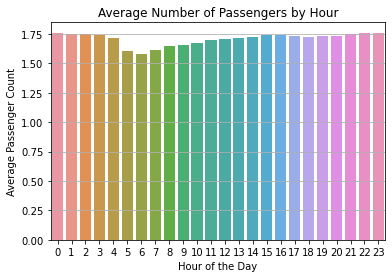

In [38]:
sns.barplot(x=list(hour_pass.keys()),y=averages)
plt.grid(axis='y')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Passenger Count")
plt.title("Average Number of Passengers by Hour")
plt.show()

###  10. Create a new CSV file which has only one out of every thousand rows.



In [78]:
import csv
file ='trip_data_5.csv'
f = open(file,'r')
reader = csv.reader(f)
with open('subset_data.csv','w') as f1:
    f1.write('')

with open('subset_data.csv','a') as f1:
    writer = csv.writer(f1, delimiter=',', lineterminator='\n')
    header = next(reader)
    writer.writerow(header)
    for i,row in enumerate(reader):
        if i > 0:
            i += 1
            if i % 1000 == 0:
                writer.writerow(row)
        if i > 1000000000:
            break

### 11. Repeat step 9 with the reduced dataset and compare the two charts.

In [84]:
import csv
with open('subset_data.csv', 'r') as file:
    csv = csv.reader(file)
    subset_data = list(csv)
    
print(len(subset_data))

15286


In [90]:
len(data)

15285050

In [87]:
hour_pass={}
for i in range(24):
    hour_pass[i]=[]

for row in range(1,len(subset_data)):
    time=datetime.strptime(subset_data[row][5],'%Y-%m-%d %H:%M:%S').hour
    hour_pass[time].append(int(subset_data[row][7]))
    
averages=[]
for i in range(len(hour_pass)):
    mean=sum(hour_pass[i])/len(hour_pass[i])
    averages.append(mean)

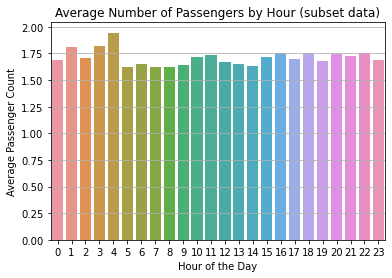

In [89]:
sns.barplot(x=list(hour_pass.keys()),y=averages)
plt.grid(axis='y')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Passenger Count")
plt.title("Average Number of Passengers by Hour (subset data)")
plt.show()

   1. When compared to the full data, the average number of passengers at [1, 3, 4] hours is higher. Due to a lack of enough information. 
   2. The amount of data affects the value of "Average." 
   3. More passengers are included in the majority of the reduced data at [1,3,4] hours. Whereas the total data really balances the number of travelers at [1,3,4] hours